<a href="https://colab.research.google.com/github/kumbieny/kumbieny/blob/main/SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install Tensorflow
!pip install -q tensorflow-gpu==2.9.0
import tensorflow as tf
print(tf.__version__)

2.9.0


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


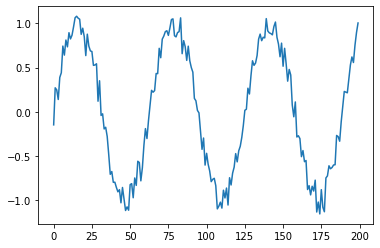

In [3]:
#Make original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
#plot it
plt.plot(series)
plt.show()

In [4]:
###build the dataset
#Let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) #The data should be NxTxD
Y=np.array(Y)
N = len(x)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [5]:
#building an RNN
#Try an autoregressive RNN model
i = Input(shape=(T, 1 ))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

#Train the RNN
r = model.fit(X[:-N//2], Y[:-N//2],epochs=80,validation_data=(X[-N//2:], Y[-N//2:]))

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


6/6 [==============================] - 2s 56ms/step - loss: 0.3875 - val_loss: 0.1648
Epoch 2/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0835 - val_loss: 0.0733
Epoch 3/80
6/6 [==============================] - 0s 8ms/step - loss: 0.0459 - val_loss: 0.0777
Epoch 4/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0402 - val_loss: 0.0234
Epoch 5/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0347 - val_loss: 0.0797
Epoch 6/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0331 - val_loss: 0.0134
Epoch 7/80
6/6 [==============================] - 0s 10ms/step - loss: 0.0288 - val_loss: 0.0711
Epoch 8/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0281 - val_loss: 0.0159
Epoch 9/80
6/6 [==============================] - 0s 8ms/step - loss: 0.0259 - val_loss: 0.0428
Epoch 10/80
6/6 [==============================] - 0s 9ms/step - loss: 0.0243 - val_loss: 0.0292
Epoch 11/80
6/6 [==============================

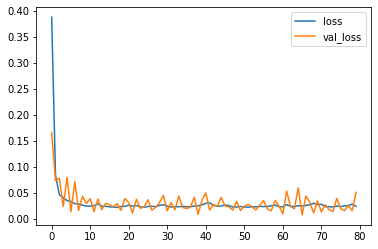

In [6]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [7]:
validation_target = Y[-N//2:]
validation_predictions= []

#index of first validation
i=-N//2

while len(validation_predictions)<len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0, 0] #1x1 array->scalar
  i+=1
  #update the predictions lists
  validation_predictions.append(p)

1/1 [==============================] - 0s 29ms/step


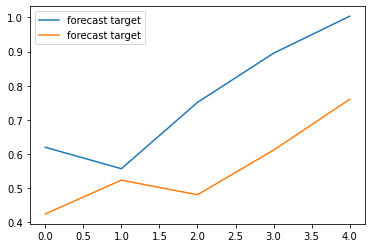

In [8]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast target')
plt.legend()

In [9]:
validation_target = Y[-N//2:]
validation_predictions=[]

#last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions)<len(validation_target):
  p=model.predict(last_x.reshape(1, -1, 1))[0, 0] #1x1 array->scalar

  #update the predictions
  validation_predictions.append(p)
  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1]=p

1/1 [==============================] - 0s 18ms/step


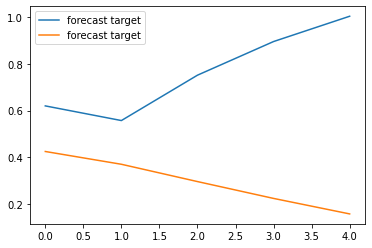

In [10]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast target')
plt.legend()